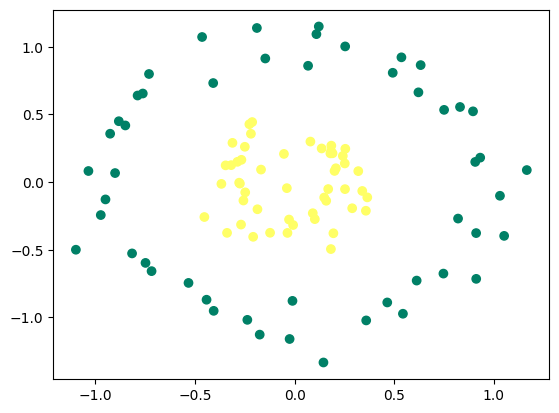

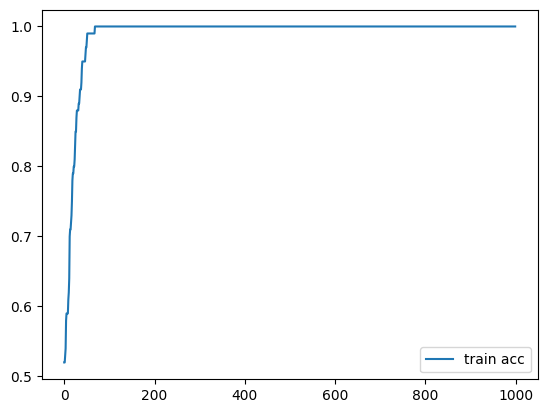

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, log_loss

#import torchmetrics
#note personnelle : il faut utiliser la commande python et non python3.8


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #définition des fonctions utilisées dans le forward
        self.hidden = torch.nn.Linear(100, 32)
        self.output = torch.nn.Linear(32, 100)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        hidden = self.sigmoid(self.hidden(x)) #calcul première couche (entrée)
        output = self.sigmoid(self.output(hidden)) #calcul seconde couche (sortie)
        return output




# Effectuer une prédiction sur une entrée de dimension (batch_size, input_size)
X = torch.Tensor([
    [-0.94957536, 0.09138459, 0.93214973, 0.20734231, -0.36750218, 0.2532073,
-0.40867925, -0.27450909, 0.24224991, 0.158872, 0.17984262, 0.19490678,
-0.18640787, 0.12157863, 0.49287043, -0.81607272, -0.88256159, -0.90136274,
-0.44207091, 0.63318667, 0.74738819, 0.07947606, 0.83076047, -0.28699936,
0.91209859, 1.05235514, 0.62194713, 0.35809164, -0.03880452, -0.16849662,
0.18452538, -0.33911143, 0.10167817, -0.24980872, 0.3198604, -0.97315797,
-0.73097704, 0.25473331, -0.21290872, -0.27834832, 1.16614005, 0.19060984,
0.54409779, 0.35966887, 0.89607094, -0.1892848, -0.46440441, 0.46542725,
-0.02494581, 0.75084969, -0.02786858, -0.05339409, 0.90718408, -0.40622936,
-0.74854102, 0.36512093, 0.10964665, -0.17507169, -0.92614192, 0.25215638,
0.2540514, -0.71813367, -0.21920932, 0.20066063, -0.45295043, -0.26890899,
-0.53262577, -0.12304334, -0.14706275, 0.18244661, -0.76217167, -1.09814276,
1.03134551, 0.28932654, 0.33985089, -0.31844734, -0.78830944, 0.14875111,
-0.34621142, -0.24788535, -1.03522483, -0.01059175, -0.25693921, 0.91169518,
0.14499169, -0.22702077, 0.18360624, 0.06782759, -0.00733005, -0.31198216,
-0.03575288, -0.23718862, -0.84991065, -0.20797388, 0.53654176, 0.16885665,
-0.26702753, 0.1359203, 0.82087304, 0.61304799],
 [-0.12813035, -0.23000817, 0.18081215, 0.10226083, -0.01327843, -0.05203713, 
  0.73225992, -0.01129157, 0.19336875, -0.1382192, 0.21222537, -0.378387,
-0.20091598, 1.15057745, 0.8082293, -0.52736928, 0.45011628, 0.06675095, 
-0.86978873, 0.8650562, -0.67652354, 0.2995841, 0.55536396, 0.14986059, 
-0.71548415, -0.39770103, 0.66363424, -0.21190579, -0.04479644, 0.09246966, 
0.26943691, -0.37541346, -0.27383157, 0.26103118, 0.08111827, -0.24370005, 
0.79925201, 0.24617894, 0.44389159, -0.00448651, 0.08892456, 0.21286408, 
-0.97343377, -1.02284615, 0.52314367, 1.1393919, 1.07276126, -0.88994615, 
-1.16013548, 0.53400186, -0.2768946, 0.20833059, 0.14907219, -0.95198749, 
-0.5975383, -0.11304964, 1.0938811, -1.12779988, 0.35762079, 0.13782711, 
1.00316909, -0.65838026, 0.35727189, 0.08256359, -0.25828402, -0.31417928, 
-0.74551749, -0.37467242, 0.91388133, -0.49524183, 0.65493707, -0.50010396, 
-0.10116975, -0.19339448, -0.06559569, 0.12536031, 0.64013156, -0.11399355, 
0.12376982, -0.07589191, 0.08194666, -0.87830074, -0.13619794, -0.37699514, 
-1.33376406, 0.42786757, 0.227532, 0.86000564, -0.31734599, 0.29011826, 
-0.37579939, -1.01857636, 0.41878948, -0.40463448, 0.92245093, -0.05156667, 
0.16465775, 0.24870812, -0.26971282, -0.72820082]])
y=torch.Tensor([
    0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
    1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0
])


# Initialisation du modèle
model = Net()

# Fonction de coût
criterion = nn.CrossEntropyLoss() #fonction de coût : logloss

# Optimiseur (descente de gradient stochastique avec un taux d'apprentissage de 0.01)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Boucle d'apprentissage
train_acc=[]
for epoch in range(1000):
    # Forward pass
    y_pred = model(X)
   
    # Calcul de la perte
    loss = criterion(y_pred[1], y)
    #on prend la secondes coordonnée de y_pred car cela correspond au résultat de la deuxième fonction d'activation : la sortie
    #(il me semble)
    
    Ny=np.array([int(i) for i in y]) #car tensor.numpy() ne fonctionne pas pour une raison inconnue
    NyPred=np.array([int(i >= .5) for i in y_pred[1]])
    train_acc.append(accuracy_score(Ny, NyPred))

    # Backward pass et mise à jour des poids
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

aX=np.array([[-0.94957536, 0.09138459, 0.93214973, 0.20734231, -0.36750218, 0.2532073,
-0.40867925, -0.27450909, 0.24224991, 0.158872, 0.17984262, 0.19490678,
-0.18640787, 0.12157863, 0.49287043, -0.81607272, -0.88256159, -0.90136274,
-0.44207091, 0.63318667, 0.74738819, 0.07947606, 0.83076047, -0.28699936,
0.91209859, 1.05235514, 0.62194713, 0.35809164, -0.03880452, -0.16849662,
0.18452538, -0.33911143, 0.10167817, -0.24980872, 0.3198604, -0.97315797,
-0.73097704, 0.25473331, -0.21290872, -0.27834832, 1.16614005, 0.19060984,
0.54409779, 0.35966887, 0.89607094, -0.1892848, -0.46440441, 0.46542725,
-0.02494581, 0.75084969, -0.02786858, -0.05339409, 0.90718408, -0.40622936,
-0.74854102, 0.36512093, 0.10964665, -0.17507169, -0.92614192, 0.25215638,
0.2540514, -0.71813367, -0.21920932, 0.20066063, -0.45295043, -0.26890899,
-0.53262577, -0.12304334, -0.14706275, 0.18244661, -0.76217167, -1.09814276,
1.03134551, 0.28932654, 0.33985089, -0.31844734, -0.78830944, 0.14875111,
-0.34621142, -0.24788535, -1.03522483, -0.01059175, -0.25693921, 0.91169518,
0.14499169, -0.22702077, 0.18360624, 0.06782759, -0.00733005, -0.31198216,
-0.03575288, -0.23718862, -0.84991065, -0.20797388, 0.53654176, 0.16885665,
-0.26702753, 0.1359203, 0.82087304, 0.61304799],
 [-0.12813035, -0.23000817, 0.18081215, 0.10226083, -0.01327843, -0.05203713, 
  0.73225992, -0.01129157, 0.19336875, -0.1382192, 0.21222537, -0.378387,
-0.20091598, 1.15057745, 0.8082293, -0.52736928, 0.45011628, 0.06675095, 
-0.86978873, 0.8650562, -0.67652354, 0.2995841, 0.55536396, 0.14986059, 
-0.71548415, -0.39770103, 0.66363424, -0.21190579, -0.04479644, 0.09246966, 
0.26943691, -0.37541346, -0.27383157, 0.26103118, 0.08111827, -0.24370005, 
0.79925201, 0.24617894, 0.44389159, -0.00448651, 0.08892456, 0.21286408, 
-0.97343377, -1.02284615, 0.52314367, 1.1393919, 1.07276126, -0.88994615, 
-1.16013548, 0.53400186, -0.2768946, 0.20833059, 0.14907219, -0.95198749, 
-0.5975383, -0.11304964, 1.0938811, -1.12779988, 0.35762079, 0.13782711, 
1.00316909, -0.65838026, 0.35727189, 0.08256359, -0.25828402, -0.31417928, 
-0.74551749, -0.37467242, 0.91388133, -0.49524183, 0.65493707, -0.50010396, 
-0.10116975, -0.19339448, -0.06559569, 0.12536031, 0.64013156, -0.11399355, 
0.12376982, -0.07589191, 0.08194666, -0.87830074, -0.13619794, -0.37699514, 
-1.33376406, 0.42786757, 0.227532, 0.86000564, -0.31734599, 0.29011826, 
-0.37579939, -1.01857636, 0.41878948, -0.40463448, 0.92245093, -0.05156667, 
0.16465775, 0.24870812, -0.26971282, -0.72820082]])

#référence
ay=np.array([int(i >= .5) for i in y_pred[1]])  #y_pred
plt.scatter(aX[0, :], aX[1, :], c=ay, cmap='summer')
plt.show()

plt.plot(train_acc, label='train acc')
plt.legend()
plt.show()


99 0.775219318010767
199 0.6464935069672161
299 0.5398487507061164
399 0.45101594924099075
499 0.37700239798380974
599 0.31532146767082014
699 0.26390634924244083
799 0.22103872062227772
899 0.185289613891247
999 0.15547038219786008
1099 0.13059202988844362
1199 0.10983146991088451
1299 0.09250352074541536
1399 0.07803766012982796
1499 0.06595872223752516
1599 0.05587086496531752
1699 0.04744424972755304
1799 0.040403971865385614
1899 0.034520858953245
1999 0.029603819795803808
Result: y = -0.21776328116077634 + 0.7689535490411894 x + 0.037528630339431386 x^2 + -0.08083318316996091 x^3


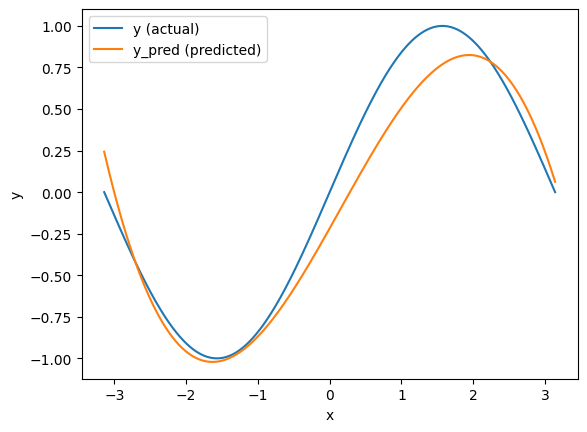

In [14]:
import matplotlib.pyplot as plt

def plot(predicted_y, true_y, x):
    """Plot the predictions and the actual data points"""
    plt.plot(x, true_y, label='y (actual)')
    plt.plot(x, predicted_y, label='y_pred (predicted)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()


import numpy as np

# Use a 1000 points between -π and π, uniformly spaced for our inputs
x = np.linspace(-np.pi, np.pi, 1000)
# And we'll try to learn true_y = sin(x)
true_y = np.sin(x)

# Randomly initialize 4 weights, the coefficients of or degree 3 polynomial
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-3
epochs = 2000
for t in range(epochs):
    # Forward pass: compute the predicted y
    # y = a + b·x + c·x² + d·x³
    predicted_y = a + b * x + c * x ** 2 + d * x ** 3
    


    # The loss is a measure of how far away the prediction is from the true y
    # Here we use the mean squared error. https://en.wikipedia.org/wiki/Mean_squared_error
    # Computing the loss is not necessary in numpy, but it will be necessary in Pytorch*
    loss = ((predicted_y - true_y)**2).mean()
    if t % 100 == 99:
        print(t, loss)

    # Compute the gradients of the loss with respect to a, b, c and d
    # Take a pen and paper!
    # Here we calculate the difference for each point and then calculate a gradient for each point.
    # Warning: predicted_y is a vector, and grad_a should be the mean gradient of each component of predicted_y.
    grad_predicted_y = 2.0 * (predicted_y - true_y)
    grad_a = grad_predicted_y.mean()
    grad_b = (grad_predicted_y * x).mean()
    grad_c = (grad_predicted_y * x ** 2).mean()
    grad_d = (grad_predicted_y * x ** 3).mean()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')
# Tip: If if does not work, try to use .mean() instead of .sum()

# Check with the plot!
plot(predicted_y, true_y, x)

99 0.3336172103881836
199 0.2721446454524994
299 0.22235670685768127
399 0.18183477222919464
499 0.1488533318042755
599 0.12200815975666046
699 0.10015696287155151
799 0.08237000554800034
899 0.06789082288742065
999 0.056103844195604324
1099 0.046507954597473145
1199 0.03869566321372986
1299 0.032335150986909866
1399 0.027156362310051918
1499 0.022939618676900864
1599 0.019506007432937622
1699 0.016709979623556137
1799 0.01443302258849144
1899 0.012578651309013367
1999 0.011068345047533512
Result: y = -0.029915032908320427 + 0.7478220462799072 x + 0.00515546090900898 x^2 + -0.07783043384552002 x^3


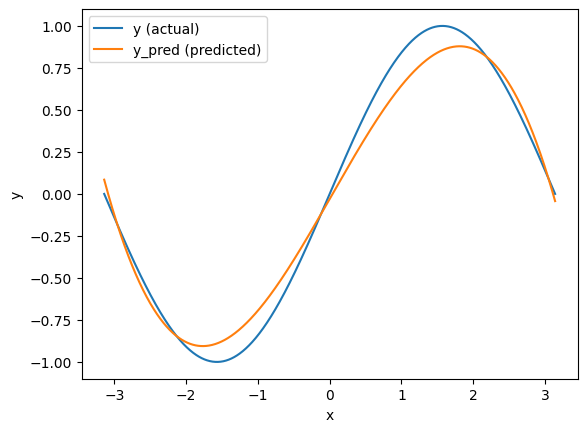

In [16]:
import matplotlib.pyplot as plt

def plot(predicted_y, true_y, x):
    """Plot the predictions and the actual data points"""
    plt.plot(x, true_y, label='y (actual)')
    plt.plot(x, predicted_y, label='y_pred (predicted)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Here You must use AUTOGRAD, ie, no need to calculate by hand the gradient.
import torch

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-torch.pi, torch.pi, 1000)
true_y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), requires_grad=True)
b = torch.randn((), requires_grad=True)
c = torch.randn((), requires_grad=True)
d = torch.randn((), requires_grad=True)

learning_rate = 1e-3
epochs = 2000
for t in range(epochs):
    # Forward pass: compute predicted y using operations on Tensors. (same as above)
    predicted_y = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (predicted_y - true_y).pow(2).mean()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    # Hint: using autograd is as simple as calling .backward() on the correct variable.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        # You can assign None or torch.zeros_like(a)
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

# Check with the plot!
plot(predicted_y.detach(), true_y.detach(), x) #demande à mettre un .detach() sinon fait l'erreur Python: Can't call numpy() on Tensor that requires grad

x.shape : [1000]
x.unsqueeze(-1).shape : [1000, 1]
powers.shape : [3]
powers_of_x.shape : [1000, 3]
99 0.1258842945098877
199 0.10481911152601242
299 0.08758669346570969
399 0.07333219051361084
499 0.06153744459152222
599 0.05177515000104904
699 0.04369274899363518
799 0.036999233067035675
899 0.031454261392354965
999 0.02685953490436077
1099 0.02305106446146965
1199 0.01989344321191311
1299 0.01727466657757759
1399 0.015102200210094452
1499 0.013299448415637016
1599 0.011803085915744305
1699 0.010560709983110428
1799 0.009528919123113155
1899 0.008671784773468971
1999 0.007959538139402866
Result: y = 0.07373256236314774 + "0.8106608390808105 x + -0.012706834822893143 x^2 + -0.08675972372293472 x^3


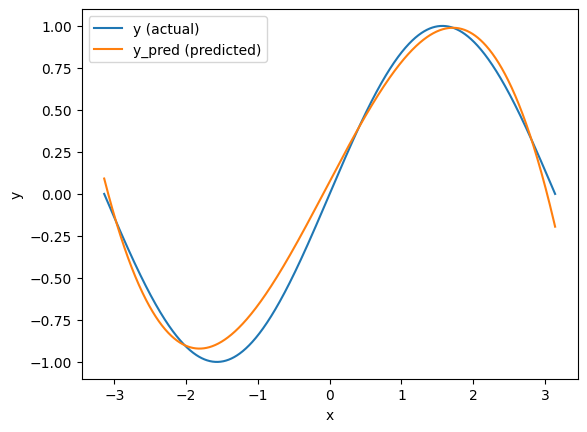

In [39]:
import matplotlib.pyplot as plt

def plot(predicted_y, true_y, x):
    """Plot the predictions and the actual data points"""
    plt.plot(x, true_y, label='y (actual)')
    plt.plot(x, predicted_y, label='y_pred (predicted)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()


import torch


# Create Tensors to hold input and outputs.
x = torch.linspace(-torch.pi, torch.pi, 1000)
true_y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. 
# Let's prepare the tensor (x, x^2, x^3).
powers = torch.tensor([1, 2, 3])
powers_of_x = x.unsqueeze(-1).pow(powers)

print("x.shape :",list(x.shape))
print("x.unsqueeze(-1).shape :",list(x.unsqueeze(-1).shape))
print("powers.shape :",list(powers.shape))
print("powers_of_x.shape :",list(powers_of_x.shape))

#Nous utilisons le paquetage nn pour définir notre modèle comme une séquence de couches.
#1) nn.Sequential est un module qui contient d'autres modules et les applique en séquence pour produire sa sortie.
#2) Le module nn.Linear calcule la sortie à partir de l'entrée à l'aide d'une fonction linéaire et contient des tenseurs internes pour son poids et son biais.
#3) La couche d'aplatissement nn.Flatten aplatit la sortie de la couche linéaire en un tenseur 1D, pour correspondre à la forme de y.

model = torch.nn.Sequential(torch.nn.Linear(3, 1), torch.nn.Flatten(start_dim=0, end_dim=1))



# The nn package also contains definitions of popular loss functions.
# in this case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='mean')

learning_rate = 1e-3
epochs = 2000
for t in range(epochs):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    predicted_y = model(powers_of_x)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(predicted_y, true_y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad #ajout

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + "{linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

# Check with the plot!
plot(predicted_y.detach(), true_y.detach(), x) #demande à mettre un .detach() sinon fait l'erreur Python: Can't call numpy() on Tensor that requires grad

ON ESSAIE AVEC SGD ICI - CELA NE FONCTIONNE PAS

x.shape : [1000]
x.unsqueeze(-1).shape : [1000, 1]
powers.shape : [3]
powers_of_x.shape : [1000, 3]
99 1.1521931886672974
199 0.9637859463691711
299 0.8877987265586853
399 0.8446722626686096
499 0.8163431882858276
599 0.7948034405708313
699 0.7764750719070435
799 0.7597576379776001
899 0.743932843208313
999 0.7286772727966309
1099 0.713842511177063
1199 0.699359118938446
1299 0.6851928234100342
1399 0.6713246703147888
1499 0.6577436923980713
1599 0.6444414854049683
1699 0.631411075592041
1799 0.6186466813087463
1899 0.6061424612998962
1999 0.5938931703567505
Result: y = 0.21161706745624542 + "-0.18251457810401917 x + -0.03652086481451988 x^2 + 0.054368872195482254 x^3


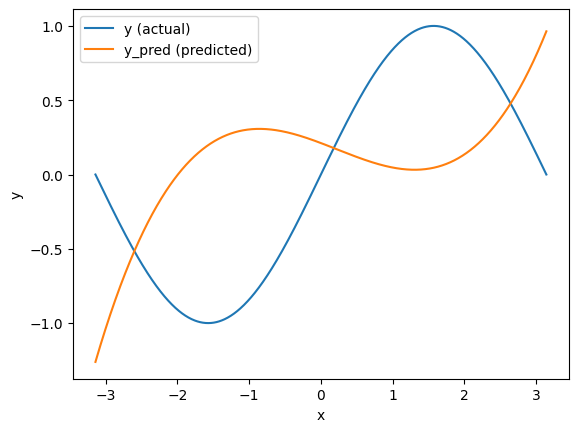

In [25]:
import matplotlib.pyplot as plt

def plot(predicted_y, true_y, x):
    """Plot the predictions and the actual data points"""
    plt.plot(x, true_y, label='y (actual)')
    plt.plot(x, predicted_y, label='y_pred (predicted)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()


import torch


# Create Tensors to hold input and outputs.
x = torch.linspace(-torch.pi, torch.pi, 1000)
true_y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. 
# Let's prepare the tensor (x, x^2, x^3).
powers = torch.tensor([1, 2, 3])
powers_of_x = x.unsqueeze(-1).pow(powers)

print("x.shape :",list(x.shape))
print("x.unsqueeze(-1).shape :",list(x.unsqueeze(-1).shape))
print("powers.shape :",list(powers.shape))
print("powers_of_x.shape :",list(powers_of_x.shape))

#Nous utilisons le paquetage nn pour définir notre modèle comme une séquence de couches.
#1) nn.Sequential est un module qui contient d'autres modules et les applique en séquence pour produire sa sortie.
#2) Le module nn.Linear calcule la sortie à partir de l'entrée à l'aide d'une fonction linéaire et contient des tenseurs internes pour son poids et son biais.
#3) La couche d'aplatissement nn.Flatten aplatit la sortie de la couche linéaire en un tenseur 1D, pour correspondre à la forme de y.

model = torch.nn.Sequential(torch.nn.Linear(3, 1), torch.nn.Flatten(start_dim=0, end_dim=1))



# The nn package also contains definitions of popular loss functions.
# in this case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='mean')

learning_rate = 1e-4
epochs = 2000
for t in range(epochs):

    predicted_y = model(powers_of_x)

    loss = loss_fn(predicted_y, true_y)
    if t % 100 == 99:
        print(t, loss.item())

    
    #model.zero_grad()

    #loss.backward()

    # Gradient Descent. 
    optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate, momentum=0.9) # On essaie avec SGD (stochastic gradient descent)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    


# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + "{linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

# Check with the plot!
plot(predicted_y.detach(), true_y.detach(), x) #demande à mettre un .detach() sinon fait l'erreur Python: Can't call numpy() on Tensor that requires grad

## Bonus: Using the GPU

x.shape : [1000]
x.unsqueeze(-1).shape : [1000, 1]
powers.shape : [3]
powers_of_x.shape : [1000, 3]
99 0.22684741020202637
199 0.1850634068250656
299 0.15140846371650696
399 0.12402691692113876
499 0.10174883157014847
599 0.08362259715795517
699 0.06887423992156982
799 0.05687393620610237
899 0.04710937663912773
999 0.03916386514902115
1099 0.03269828483462334
1199 0.027436934411525726
1299 0.023155346512794495
1399 0.019670991227030754
1499 0.01683533936738968
1599 0.014527526684105396
1699 0.012649254873394966
1799 0.011120467446744442
1899 0.009876176714897156
1999 0.00886340718716383
Result: y = -0.01962338201701641 + "0.7666725516319275 x + 0.003381830407306552 x^2 + -0.08050905168056488 x^3


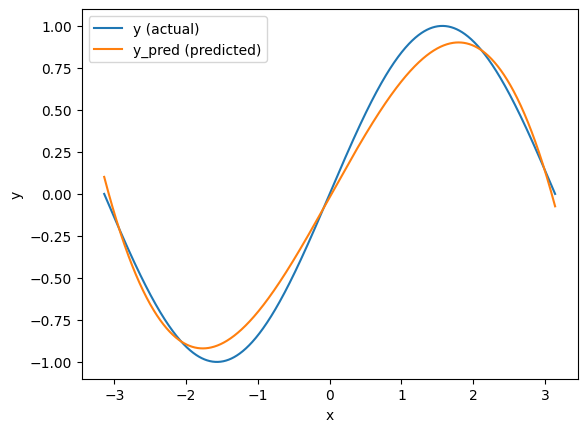

In [30]:
import matplotlib.pyplot as plt

def plot(predicted_y, true_y, x):
    """Plot the predictions and the actual data points"""
    plt.plot(x, true_y, label='y (actual)')
    plt.plot(x, predicted_y, label='y_pred (predicted)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()


import torch

#device = torch.device("cuda")
device = torch.device("cpu")


# Create Tensors to hold input and outputs.
x = torch.linspace(-torch.pi, torch.pi, 1000)
true_y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. 
# Let's prepare the tensor (x, x^2, x^3).
powers = torch.tensor([1, 2, 3])
powers_of_x = x.unsqueeze(-1).pow(powers)

print("x.shape :",list(x.shape))
print("x.unsqueeze(-1).shape :",list(x.unsqueeze(-1).shape))
print("powers.shape :",list(powers.shape))
print("powers_of_x.shape :",list(powers_of_x.shape))

#Nous utilisons le paquetage nn pour définir notre modèle comme une séquence de couches.
#1) nn.Sequential est un module qui contient d'autres modules et les applique en séquence pour produire sa sortie.
#2) Le module nn.Linear calcule la sortie à partir de l'entrée à l'aide d'une fonction linéaire et contient des tenseurs internes pour son poids et son biais.
#3) La couche d'aplatissement nn.Flatten aplatit la sortie de la couche linéaire en un tenseur 1D, pour correspondre à la forme de y.

model = torch.nn.Sequential(torch.nn.Linear(3, 1), torch.nn.Flatten(start_dim=0, end_dim=1))



# The nn package also contains definitions of popular loss functions.
# in this case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='mean')

learning_rate = 1e-3
epochs = 2000
for t in range(epochs):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    predicted_y = model(powers_of_x)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(predicted_y, true_y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad #ajout

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + "{linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

# Check with the plot!
plot(predicted_y.detach(), true_y.detach(), x) #demande à mettre un .detach() sinon fait l'erreur Python: Can't call numpy() on Tensor that requires grad